# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm
import warnings
warnings.filterwarnings("ignore")

Load feature names.

In [2]:
feature_names = []
with open('Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print 'Loaded feature names:', len(feature_names)

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print train_data.shape, test_data.shape

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [4]:
def P1():
### STUDENT START ###
    comps = range(1,51)
    for n in comps:
        pca_model = PCA(n_components=n)
        pca_model.fit(train_data)
        print 'First', n, 'Factors can explain', np.sum(pca_model.explained_variance_ratio_),'of Total Variance.'
### STUDENT END ###
P1()

First 1 Factors can explain 0.16404331279331127 of Total Variance.
First 2 Factors can explain 0.2972781014878134 of Total Variance.
First 3 Factors can explain 0.3990126667089808 of Total Variance.
First 4 Factors can explain 0.46964623103905423 of Total Variance.
First 5 Factors can explain 0.5083126931252016 of Total Variance.
First 6 Factors can explain 0.5451207108124664 of Total Variance.
First 7 Factors can explain 0.5764031128295813 of Total Variance.
First 8 Factors can explain 0.60374033122388 of Total Variance.
First 9 Factors can explain 0.6299051994231329 of Total Variance.
First 10 Factors can explain 0.6522134403423244 of Total Variance.
First 11 Factors can explain 0.6726960017128152 of Total Variance.
First 12 Factors can explain 0.6913792789951319 of Total Variance.
First 13 Factors can explain 0.7083079172841202 of Total Variance.
First 14 Factors can explain 0.725451516096682 of Total Variance.
First 15 Factors can explain 0.7406236206749481 of Total Variance.
First

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

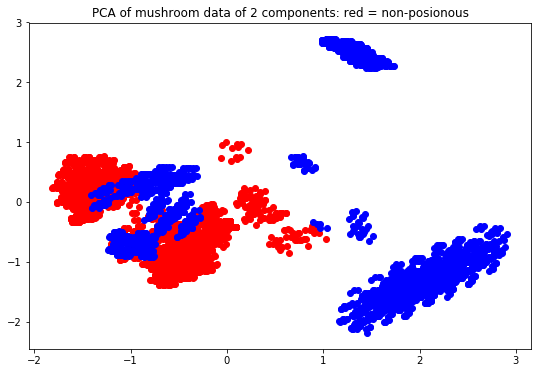

In [5]:
def P2():
### STUDENT START ###
    pca_model = PCA(n_components=2)
    pca_2 = pca_model.fit(train_data).transform(train_data)
    
    plt.figure(figsize=(9, 6))
    for c, i, label in zip("rb", [0, 1], train_labels):
        plt.scatter(pca_2[train_labels == i, 0], pca_2[train_labels == i, 1], c=c, label=label)
    plt.title('PCA of mushroom data of 2 components: red = non-posionous')
### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

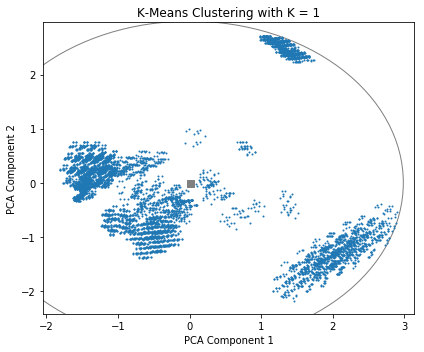

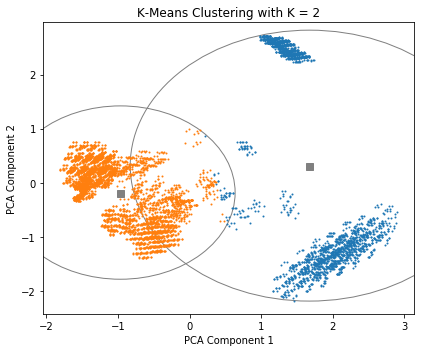

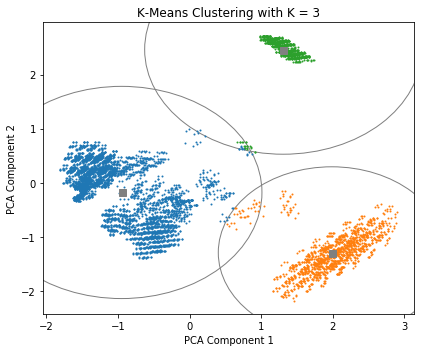

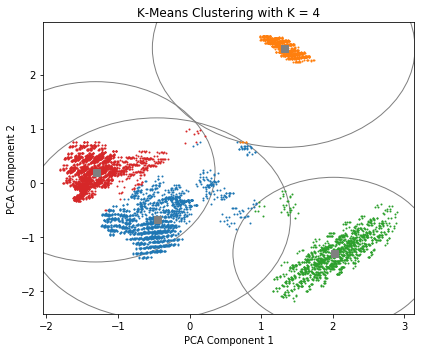

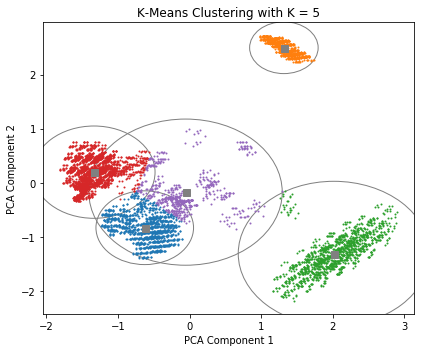

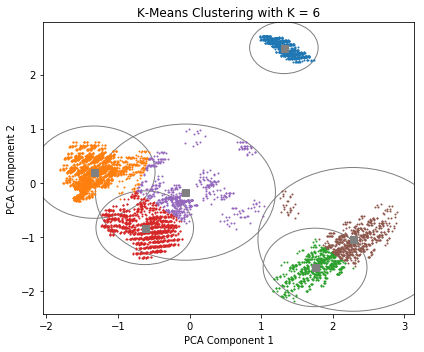

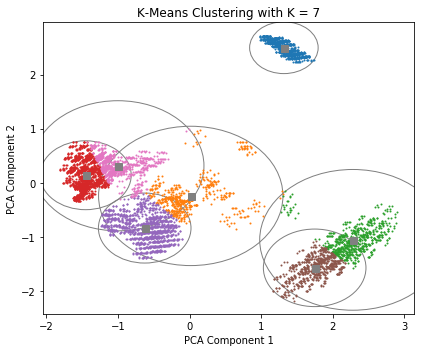

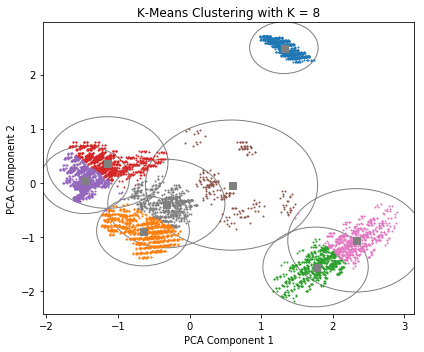

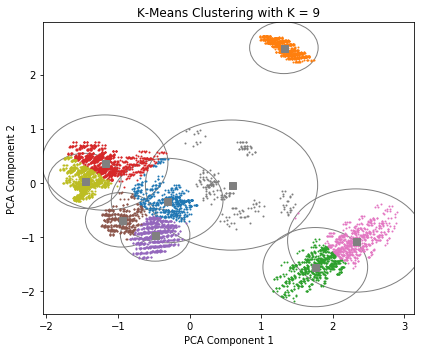

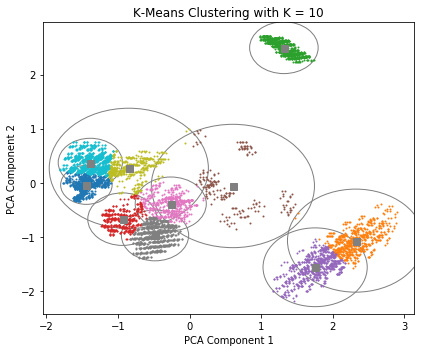

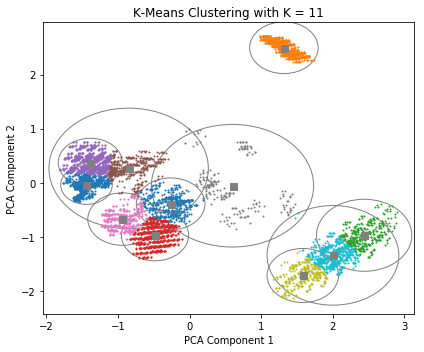

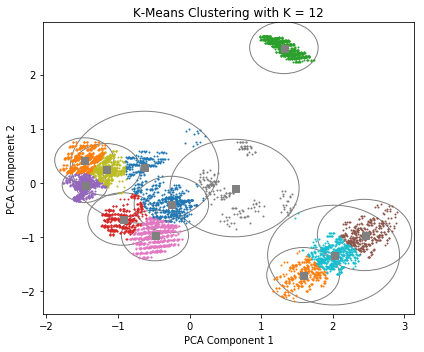

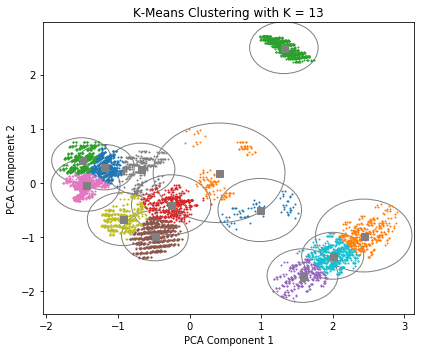

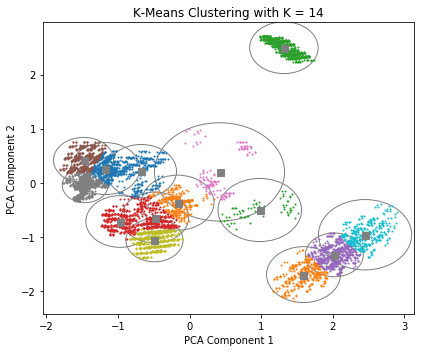

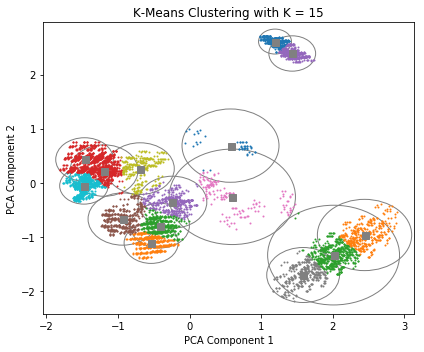

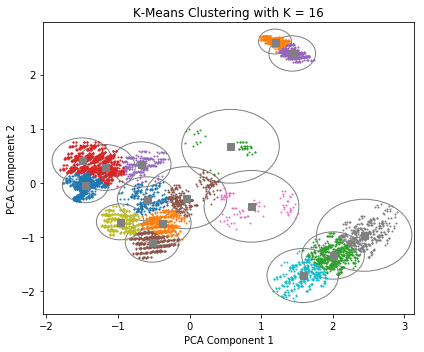

In [6]:
def P3(N):
### STUDENT START ###
    pca_model = PCA(n_components=2)
    pca_2 = pca_model.fit(train_data).transform(train_data)
    # k-means
    km = KMeans(n_clusters=N)
    train_data_km = km.fit_transform(pca_2)
    fig = plt.figure(figsize = (6, 5))
    for ind, center in enumerate(km.cluster_centers_):
        # points
        group = km.labels_==ind
        plt.plot(pca_2[:,0][group], pca_2[:,1][group], marker='.', markersize=2, linestyle='None', label=str(N))
        plt.plot(center[0], center[1], color='grey', marker='s', markersize=7)
        # draw circles
        radius = np.amax(train_data_km[group,ind])
        circle = plt.Circle(center, radius, color='grey', fill=False)
        plt.gca().add_artist(circle)
    # formatting
    plt.title("K-Means Clustering with K = {}".format(N))
    plt.ylabel('PCA Component 2')
    plt.xlabel('PCA Component 1')
    # extra formatting
    plt.tight_layout()
    plt.show()

### STUDENT END ###
for i in range(1,17):
    P3(i)

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

1 components, spherical


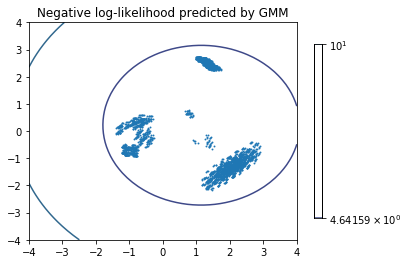

1 components, diag


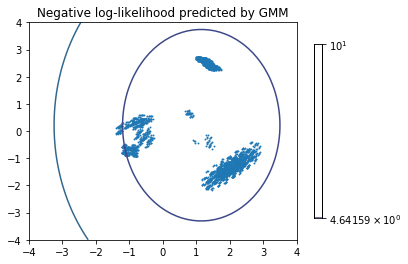

1 components, tied


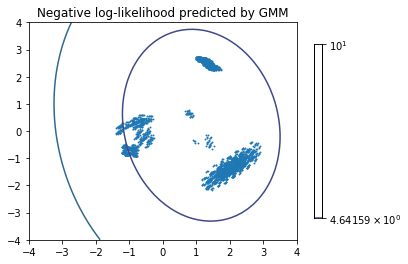

1 components, full


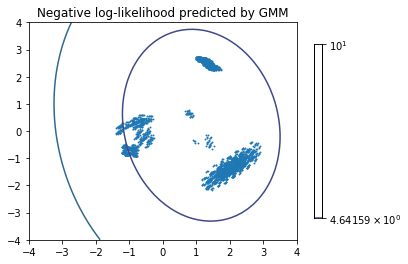

2 components, spherical


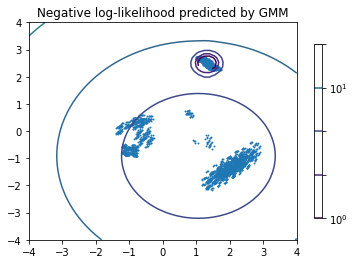

2 components, diag


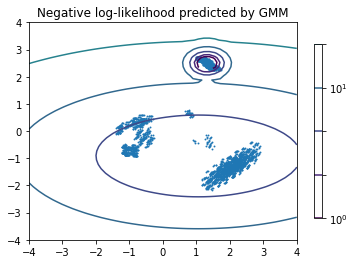

2 components, tied


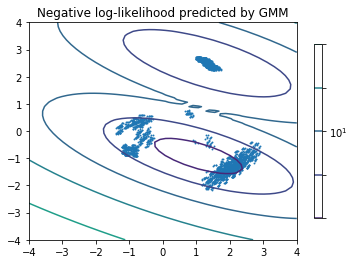

2 components, full


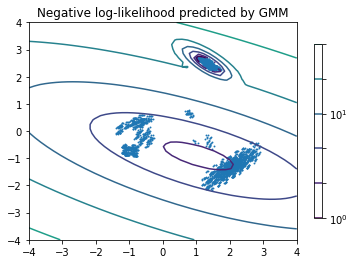

3 components, spherical


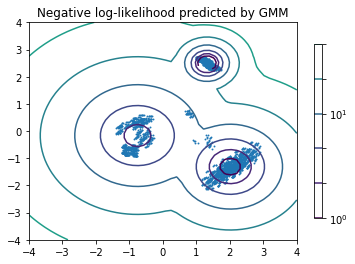

3 components, diag


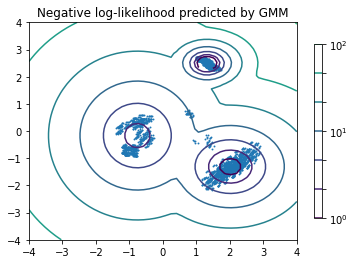

3 components, tied


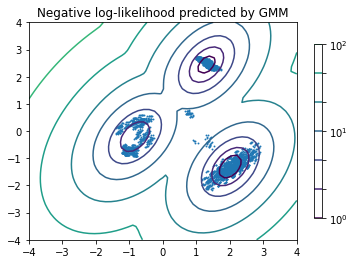

3 components, full


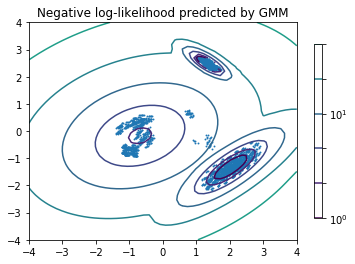

4 components, spherical


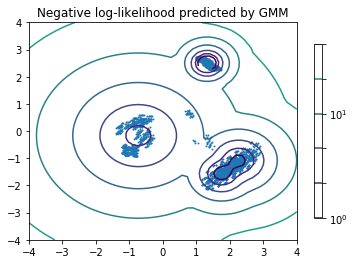

4 components, diag


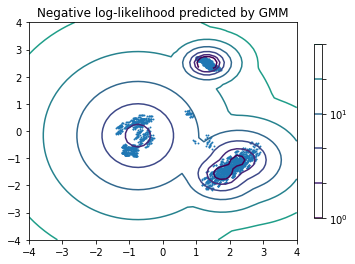

4 components, tied


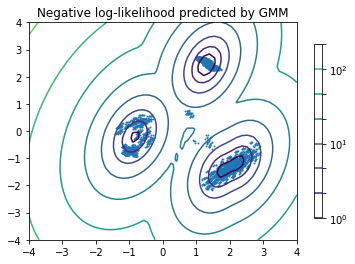

4 components, full


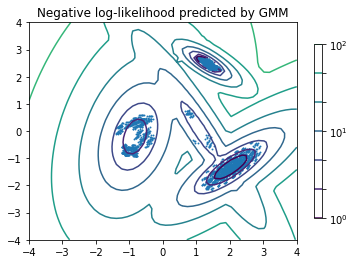

In [7]:
def P4():
### STUDENT START ###
    pca_model = PCA(n_components=2)
    pca_2 = pca_model.fit(train_data).transform(train_data)
    pos_pca = pca_2[train_labels == 1]
    components = range(1,5)
    cov_type = ['spherical', 'diag', 'tied', 'full']

    for i in components:
        for j in range(len(cov_type)):
            gmm_model = GMM(n_components=i, covariance_type=cov_type[j])
            gmm_model.fit(pos_pca)
            x = np.linspace(-4.0, 4.0)
            y = np.linspace(-4.0, 4.0)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm_model.score_samples(XX)[0]
            Z = Z.reshape(X.shape)
            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
            plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(pos_pca[:,0], pos_pca[:,1], 0.8)
            print str(i) + ' components, ' + str(cov_type[j])
            plt.title('Negative log-likelihood predicted by GMM')
            plt.show()
### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [8]:
def P5():
### STUDENT START ###
    pca_model = PCA(n_components=2)
    pca_train = pca_model.fit(train_data).transform(train_data)
    pos_pca = pca_train[train_labels == 1]
    neg_pca = pca_train[train_labels == 0]
    
    gmm_pos = GMM(n_components=4, covariance_type='full', random_state=50)
    gmm_pos.fit(pos_pca)
    
    gmm_neg = GMM(n_components=4, covariance_type='full', random_state=50)
    gmm_neg.fit(neg_pca)
    
    pca_test = pca_model.transform(test_data)
    pos_scores = gmm_pos.score(pca_test)
    neg_scores = gmm_neg.score(pca_test)
    predict_labels = (pos_scores >= neg_scores).astype(int)


    pos_predict = gmm_pos.predict(pca_test)
    neg_predict = gmm_neg.predict(pca_test)
         
    pos_acc = np.mean(pos_predict.ravel() == test_labels.ravel())
    neg_acc = np.mean(neg_predict.ravel() == test_labels.ravel())
    net_acc = np.mean(predict_labels == test_labels)
    
    print 'Model accuracy =', net_acc
### STUDENT END ###

P5()

Model accuracy = 0.951067615658363


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [9]:
def P6():
### STUDENT START ###
    pca_components = range(1,51)
    gmm_components = range(1,201)
    cov_types = ['spherical', 'diag', 'tied', 'full']
    
    # loop through covariance types separately since they have different parameter calculations
    # Spherical
    spher_results = []
    for i in pca_components:
        # PCA
        pca_model = PCA(n_components=i)
        pca_train = pca_model.fit(train_data).transform(train_data)
        pca_test = pca_model.transform(test_data)
        # seperate type
        pos = pca_train[train_labels==1]
        neg = pca_train[train_labels==0]
        for j in gmm_components:
            parameters = (i+1)*j*2
            if parameters > 50:
                pass
            else:             
                # fit positive model
                gmm_pos = GMM(n_components=j, covariance_type='spherical')
                gmm_pos.fit(pos)
                prob_pos = gmm_pos.score(pca_test)
                # fit negative model
                gmm_neg = GMM(n_components=j, covariance_type='spherical')
                gmm_neg.fit(neg)
                prob_neg = gmm_neg.score(pca_test)
                # Calculate prediction and accuracy
                poisonous = prob_pos > prob_neg
                correct = np.equal(poisonous, test_labels)
                accuracy = np.sum(correct)*100.0/len(correct)
                
                spher_results.append([accuracy, i, j, parameters])
    spher_results = np.array(spher_results)
    max_accuracy = np.amax(spher_results[:,0])
    print 'Spherical max accuracy with < 50 parameters =', max_accuracy
    
    # Diagonal
    diag_results = []
    for i in pca_components:
        # PCA
        pca_model = PCA(n_components=i)
        pca_train = pca_model.fit(train_data).transform(train_data)
        pca_test = pca_model.transform(test_data)
        # seperate type
        pos = pca_train[train_labels==1]
        neg = pca_train[train_labels==0]
        for j in gmm_components:
            parameters = (i+i)*j*2            
            if parameters > 50:
                pass
            else:            
                # fit positive model
                gmm_pos = GMM(n_components=j, covariance_type='diag')
                gmm_pos.fit(pos)
                prob_pos = gmm_pos.score(pca_test)
                # fit negative model
                gmm_neg = GMM(n_components=j, covariance_type='diag')
                gmm_neg.fit(neg)
                prob_neg = gmm_neg.score(pca_test)
                # Calculate prediction and accuracy
                poisonous = prob_pos > prob_neg
                correct = np.equal(poisonous, test_labels)
                accuracy = np.sum(correct)*100.0/len(correct)
                
                diag_results.append([accuracy, i, j, parameters])
    diag_results = np.array(diag_results)
    max_accuracy = np.amax(diag_results[:,0])
    print 'Diagonal max accuracy with < 50 parameters =', max_accuracy
    
    # Tied
    tied_results = []
    for i in pca_components:
        # PCA
        pca_model = PCA(n_components=i)
        pca_train = pca_model.fit(train_data).transform(train_data)
        pca_test = pca_model.transform(test_data)
        # seperate type
        pos = pca_train[train_labels==1]
        neg = pca_train[train_labels==0]
        for j in gmm_components:
            parameters = (i*j + i*(i-1)/2+i)*2
            if parameters > 50:
                pass
            else:
                # fit positive model
                gmm_pos = GMM(n_components=j, covariance_type='tied')
                gmm_pos.fit(pos)
                prob_pos = gmm_pos.score(pca_test)
                # fit negative model
                gmm_neg = GMM(n_components=j, covariance_type='tied')
                gmm_neg.fit(neg)
                prob_neg = gmm_neg.score(pca_test)
                # Calculate prediction and accuracy
                poisonous = prob_pos > prob_neg
                correct = np.equal(poisonous, test_labels)
                accuracy = np.sum(correct)*100.0/len(correct)
                
                tied_results.append([accuracy, i, j, parameters])
    tied_results = np.array(tied_results)
    max_accuracy = np.amax(tied_results[:,0])
    print 'Tied max accuracy with < 50 parameters =', max_accuracy

    
    # Full
    full_results = []
    for i in pca_components:
        # PCA
        pca_model = PCA(n_components=i)
        pca_train = pca_model.fit(train_data).transform(train_data)
        pca_test = pca_model.transform(test_data)
        # seperate type
        pos = pca_train[train_labels==1]
        neg = pca_train[train_labels==0]
        for j in gmm_components:
            parameters = (i*j + (i*(i-1)/2+i)*j)*2
            if parameters > 50:
                pass
            else:            
                # fit positive model
                gmm_pos = GMM(n_components=j, covariance_type='tied')
                gmm_pos.fit(pos)
                prob_pos = gmm_pos.score(pca_test)
                # fit negative model
                gmm_neg = GMM(n_components=j, covariance_type='tied')
                gmm_neg.fit(neg)
                prob_neg = gmm_neg.score(pca_test)
                # Calculate prediction and accuracy
                poisonous = prob_pos > prob_neg
                correct = np.equal(poisonous, test_labels)
                accuracy = np.sum(correct)*100.0/len(correct)
                
                full_results.append([accuracy, i, j, parameters])
    full_results = np.array(full_results)
    max_accuracy = np.amax(full_results[:,0])
    print 'Full max accuracy with < 50 parameters =', max_accuracy

    print '\n'
    print 'Spherical Results:'
    print spher_results, '\n'
    print 'Diagonal Results:'
    print diag_results, '\n'
    print 'Tied Results:'
    print tied_results, '\n'
    print 'Full Results:'
    print full_results, '\n'
    
### STUDENT END ###

P6()

Spherical max accuracy with < 50 parameters = 97.33096085409252
Diagonal max accuracy with < 50 parameters = 95.01779359430606
Tied max accuracy with < 50 parameters = 96.79715302491103
Full max accuracy with < 50 parameters = 94.66192170818505


Spherical Results:
[[84.43060498  1.          1.          4.        ]
 [89.94661922  1.          2.          8.        ]
 [90.3024911   1.          3.         12.        ]
 [91.37010676  1.          4.         16.        ]
 [90.65836299  1.          5.         20.        ]
 [90.83629893  1.          6.         24.        ]
 [91.19217082  1.          7.         28.        ]
 [91.01423488  1.          8.         32.        ]
 [91.01423488  1.          9.         36.        ]
 [91.01423488  1.         10.         40.        ]
 [91.01423488  1.         11.         44.        ]
 [91.01423488  1.         12.         48.        ]
 [86.03202847  2.          1.          6.        ]
 [87.36654804  2.          2.         12.        ]
 [94.57295374  2.   

The best model with fewer than 50 parameters uses 7 PCA components, 3 GMM components and a Spherical covariance type. That model has 48 parameters and achieved an accuracy of 97.33%.